# Regression Model Development
## Domain Knowledge

In [2]:
# importing libraries
# data science essentials, graphics, and regression models
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np      
import seaborn as sns 
import statsmodels.formula.api as smf # predictive modeling with nice outputs
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # test data to determine the values 

# new libraries
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = './Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
chef = pd.read_excel(io = file)

# to know the number of rows and columns 
chef.shape

# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {chef.shape[0]}
Features:     {chef.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 1946
Features:     28



In [3]:
# column names for the table 
print(chef.columns)

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'], dtype='object')


In [4]:
#checking the top 20 rows
chef.head(n = 20)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.00,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.00,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.00,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.00,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.00,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205
5,1550.00,1,Genna Lannister,genna.lannister@protonmail.com,Genna,Lannister,36,2,9,1,190.18,1,4,0,1,4,1,0,0,3,1,0,78.8,1,1,3,12,0
6,1430.00,1,Olene Tyrell,olene.tyrell@mcdonalds.com,Olene,Tyrell,61,7,6,2,154.20,1,1,0,1,6,1,45,1,2,1,1,84.8,1,0,3,12,169
7,1321.25,1,Stevron Frey,stevron.frey@travelers.com,Stevron,Frey,13,1,12,3,228.73,1,0,0,1,6,1,13,0,0,0,0,63.0,1,0,1,15,0
8,1505.00,1,Praed,praed@nike.com,Praed,Praed,16,1,12,5,14.26,1,0,0,1,6,1,52,0,1,0,0,63.0,1,0,2,18,0
9,1493.00,0,Alysane Mormont,alysane.mormont@caterpillar.com,Alysane,Mormont,95,3,6,8,49.26,1,0,0,0,6,1,12,0,2,1,0,84.8,1,1,3,14,147


In [5]:
# descriptive statistics for the numeric data
chef.describe(include = 'number').round(decimals = 2)


,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,0.71,5.52,1.48,11.33,1.49,2.97,0.36,0.11,150.56,4.44,0.60,2.79,13.51,106.43
std,1138.29,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,0.45,0.58,0.53,13.57,2.32,2.74,0.48,0.32,49.45,1.55,0.64,0.76,2.33,181.01
min,131.00,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,1.00,0.00,1.00,5.00,0.00
25%,1350.00,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,114.40,3.00,0.00,2.00,12.00,0.00
50%,1740.00,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,145.60,4.00,1.00,3.00,13.00,0.00
75%,2670.00,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,1.00,6.00,2.00,13.00,3.00,4.00,1.00,0.00,173.78,5.00,1.00,3.00,15.00,174.00
max,8793.75,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,564.20,11.00,3.00,5.00,19.00,1600.00


In [6]:
# Information about each variable, which ones 
chef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   CROSS_SELL_SUCCESS           1946 non-null   int64  
 2   NAME                         1946 non-null   object 
 3   EMAIL                        1946 non-null   object 
 4   FIRST_NAME                   1946 non-null   object 
 5   FAMILY_NAME                  1899 non-null   object 
 6   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 11  MOBILE_NUMBER                1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON    1946 non-null   int64  
 13  CANCELLATIONS_AFTE

In [7]:
#Check out is there are any null values and if they need to be taken care of 
chef.isnull().sum(axis = 0)

REVENUE                         0
CROSS_SELL_SUCCESS              0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    47
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

In [8]:
# calling out to fill missing value 
fill = 'NA'

# imputing 'FAMILY_NAME' so it doesn't cause an interupption
chef['FAMILY_NAME'] = chef['FAMILY_NAME'].fillna(fill)

# making sure all missing values are accounted for
chef.isnull().any().any()

False

In [9]:
# creating a list of continuous features (including Revenue)
og_data = ['REVENUE', 'CROSS_SELL_SUCCESS', 'EMAIL', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
       'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
       'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
       'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS',
       'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
       'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME',
       'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING',
       'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED']
                   
                   
# developing a correlation matrix based on all the variables
chef_corr = chef[og_data].corr(method = 'pearson')

# filtering the results to only show correlations with REVENUE
chef_corr.loc[ : , 'REVENUE'].round(decimals = 2).sort_values(ascending = False)

REVENUE                        1.00
AVG_PREP_VID_TIME              0.64
MEDIAN_MEAL_RATING             0.61
TOTAL_MEALS_ORDERED            0.60
TOTAL_PHOTOS_VIEWED            0.47
MASTER_CLASSES_ATTENDED        0.45
LARGEST_ORDER_SIZE             0.44
AVG_TIME_PER_SITE_VISIT        0.14
CONTACTS_W_CUSTOMER_SERVICE    0.10
MOBILE_NUMBER                  0.03
PRODUCT_CATEGORIES_VIEWED      0.03
PC_LOGINS                      0.02
TASTES_AND_PREFERENCES         0.01
CANCELLATIONS_BEFORE_NOON      0.01
WEEKLY_PLAN                    0.01
REFRIGERATED_LOCKER           -0.00
EARLY_DELIVERIES              -0.00
CROSS_SELL_SUCCESS             0.00
LATE_DELIVERIES               -0.01
PACKAGE_LOCKER                -0.01
MOBILE_LOGINS                 -0.02
CANCELLATIONS_AFTER_NOON      -0.04
UNIQUE_MEALS_PURCH            -0.06
AVG_CLICKS_PER_VISIT          -0.55
Name: REVENUE, dtype: float64

In [10]:
# creating a list of continuous features (including REVENUE)
continuous_data = ['REVENUE',
                    'TOTAL_MEALS_ORDERED',
                    'UNIQUE_MEALS_PURCH',
                    'CONTACTS_W_CUSTOMER_SERVICE',
                    'PRODUCT_CATEGORIES_VIEWED',
                    'AVG_TIME_PER_SITE_VISIT',
                    'MOBILE_LOGINS',
                    'PC_LOGINS',
                    'WEEKLY_PLAN',
                    'EARLY_DELIVERIES',
                    'LATE_DELIVERIES',
                    'LARGEST_ORDER_SIZE',
                    'MASTER_CLASSES_ATTENDED',
                    'AVG_CLICKS_PER_VISIT',
                    'TOTAL_PHOTOS_VIEWED']

# developing a correlation matrix based on continuous features
meal_corr = chef[continuous_data].corr(method = 'pearson')


# filtering the results to only show correlations with REVENUE
meal_corr.loc[ : , 'REVENUE'].round(decimals = 2).sort_values(ascending = False)

REVENUE                        1.00
TOTAL_MEALS_ORDERED            0.60
TOTAL_PHOTOS_VIEWED            0.47
MASTER_CLASSES_ATTENDED        0.45
LARGEST_ORDER_SIZE             0.44
AVG_TIME_PER_SITE_VISIT        0.14
CONTACTS_W_CUSTOMER_SERVICE    0.10
PRODUCT_CATEGORIES_VIEWED      0.03
PC_LOGINS                      0.02
WEEKLY_PLAN                    0.01
EARLY_DELIVERIES              -0.00
LATE_DELIVERIES               -0.01
MOBILE_LOGINS                 -0.02
UNIQUE_MEALS_PURCH            -0.06
AVG_CLICKS_PER_VISIT          -0.55
Name: REVENUE, dtype: float64

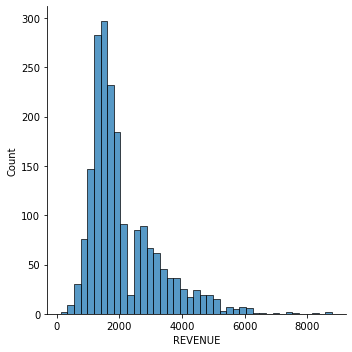

In [11]:
#check if Revenue is skwe'd 
sns.displot(chef['REVENUE'])

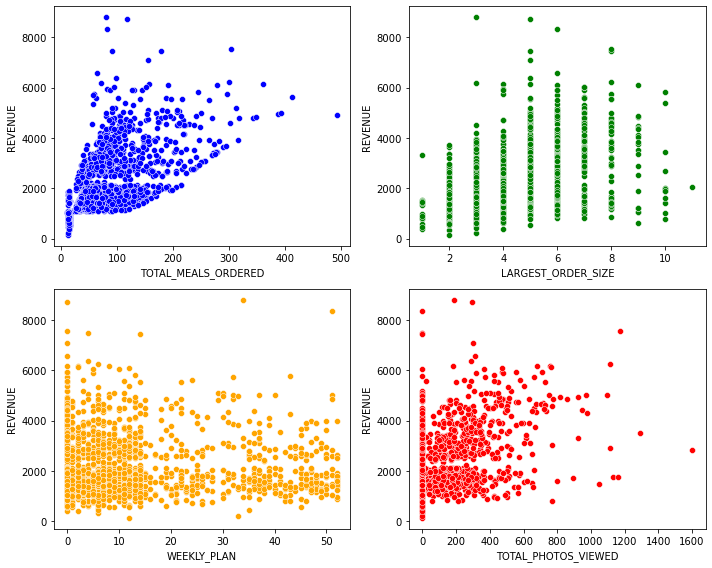

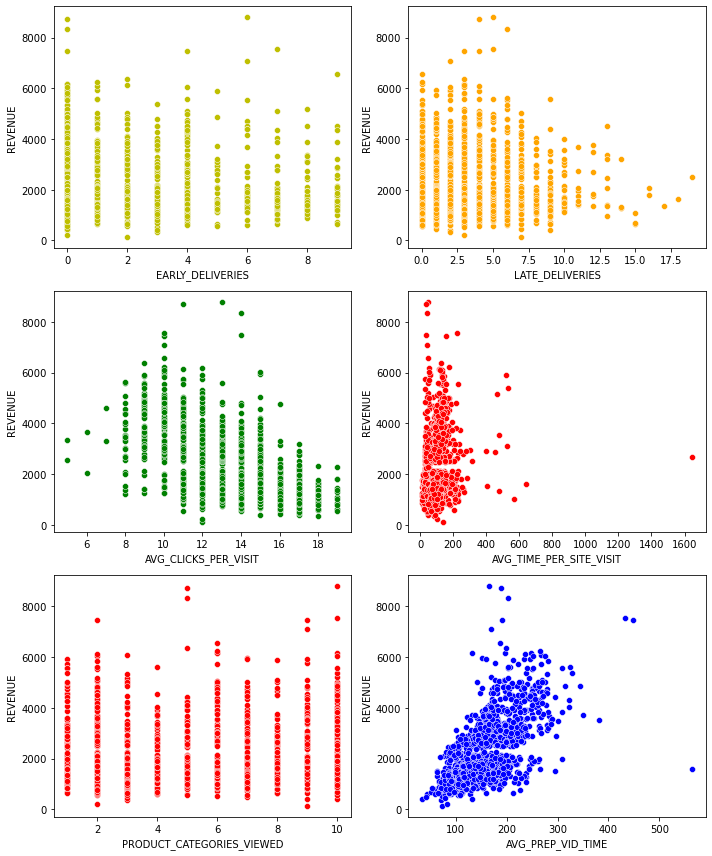

In [12]:
########################
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


#with this model you have see that everything is moving with the trend

# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['TOTAL_MEALS_ORDERED'],
                y = chef['REVENUE'],
                color = 'b')


# adding labels but not adding title
plt.xlabel(xlabel = 'TOTAL_MEALS_ORDERED')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['LARGEST_ORDER_SIZE'],
                y = chef['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'LARGEST_ORDER_SIZE')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['WEEKLY_PLAN'],
                y = chef['REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'WEEKLY_PLAN')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['TOTAL_PHOTOS_VIEWED'],
                y = chef['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'TOTAL_PHOTOS_VIEWED')
plt.ylabel(ylabel = 'REVENUE')


# cleaning up the layout
plt.tight_layout()
plt.show()


########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))


# developing a scatterplot
plt.subplot(3, 2, 1)
sns.scatterplot(x = chef['EARLY_DELIVERIES'],
                y = chef['REVENUE'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = 'EARLY_DELIVERIES')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(3, 2, 2)
sns.scatterplot(x = chef['LATE_DELIVERIES'],
                y = chef['REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'LATE_DELIVERIES')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(3, 2, 3)
sns.scatterplot(x = chef['AVG_CLICKS_PER_VISIT'],
                y = chef['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'AVG_CLICKS_PER_VISIT')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(3, 2, 4)
sns.scatterplot(x = chef['AVG_TIME_PER_SITE_VISIT'],
                y = chef['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'AVG_TIME_PER_SITE_VISIT')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(3, 2, 5)
sns.scatterplot(x = chef['PRODUCT_CATEGORIES_VIEWED'],
                y = chef['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'PRODUCT_CATEGORIES_VIEWED')
plt.ylabel(ylabel = 'REVENUE')



# developing a scatterplot
plt.subplot(3, 2, 6)
sns.scatterplot(x = chef['AVG_PREP_VID_TIME'],
                y = chef['REVENUE'],
                color = 'b')


# adding labels but not adding title
plt.xlabel(xlabel = 'AVG_PREP_VID_TIME')
plt.ylabel(ylabel = 'REVENUE')



# cleaning up the layout
plt.tight_layout()
plt.show()


In [4]:
# setting figure size
fig, ax = plt.subplots(figsize = (15, 10))

# Plot 1: Median 
plt.subplot(2, 2, 1)

# developing a boxplot
sns.boxplot(x     = 'MEDIAN_MEAL_RATING',
            y     = 'REVENUE',
            data  = chef)


# titles and labels
plt.title(label   = 'MEDIAN_MEAL_RATING relationship')
plt.xlabel(xlabel = 'MEDIAN_MEAL_RATING')
plt.ylabel(ylabel = 'REVENUE')



# Plot 2: Master Class
plt.subplot(2, 2, 2)


# developing a boxplot
sns.boxplot(x     = 'MASTER_CLASSES_ATTENDED',
            y     = 'REVENUE',
            data  = chef)


# titles and labels
plt.title(label   = 'Relationship MASTER_CLASSES_ATTENDED')
plt.xlabel(xlabel = 'MASTER_CLASSES_ATTENDED')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.tight_layout
plt.show()


# printing value counts for meal rating and master class attended
print(f"""
Count
==================

----------
Rating
----------
{chef['MEDIAN_MEAL_RATING'].value_counts(normalize = False).sort_index()}


----------
Master Class
----------
{chef['MASTER_CLASSES_ATTENDED'].value_counts(normalize = False).sort_index()}


""")


NameError: name 'plt' is not defined

In [14]:
# counting the number of zeroes
cross_zeroes   = len(chef['CROSS_SELL_SUCCESS'][chef['CROSS_SELL_SUCCESS'] == 0])
mobile_zeroes     = len(chef['MOBILE_NUMBER'][chef['MOBILE_NUMBER'] == 0])
reg_locker_zeroes   = len(chef['REFRIGERATED_LOCKER'][chef['REFRIGERATED_LOCKER'] == 0])
pack_locker_zeroes    = len(chef['PACKAGE_LOCKER'][chef['PACKAGE_LOCKER'] == 0])
taste_zeroes  = len(chef['TASTES_AND_PREFERENCES'][chef['TASTES_AND_PREFERENCES'] == 0])
weekly_zeroes    = len(chef['WEEKLY_PLAN'][chef['WEEKLY_PLAN'] == 0])

## the table below has been coded for you ##

# printing a table of the results
print(f"""
                        No\t\tYes
               ------------------------------
Cross Sell Sucess    | {cross_zeroes}\t\t{len(chef) - cross_zeroes}
Mobile Number        | {mobile_zeroes}\t\t{len(chef) - mobile_zeroes}
Package Locker       | {pack_locker_zeroes}\t\t{len(chef) - pack_locker_zeroes}
Refrigerated Locker  | {reg_locker_zeroes}\t\t{len(chef) - reg_locker_zeroes}
Taste Preference     | {taste_zeroes}\t\t{len(chef) - taste_zeroes}
Weekly Plans         | {weekly_zeroes}\t\t{len(chef) - weekly_zeroes}
""")


                        No		Yes
               ------------------------------
Cross Sell Sucess    | 625		1321
Mobile Number        | 238		1708
Package Locker       | 1255		691
Refrigerated Locker  | 1726		220
Taste Preference     | 556		1390
Weekly Plans         | 468		1478



In [15]:
#####IMPORTANT section

#need this for logins
chef.loc[: ,'total_logins'] = chef.loc[: ,'MOBILE_LOGINS'] + chef.loc[: ,'PC_LOGINS']

# dummy variable for having a basement.
chef['has_mobile_login']   = 0
chef['has_pc_login']       = 0
chef['has_total_logins']   = 0
chef['has_attended_master']= 0
chef['has_weekly_plan']    = 0

for index, value in chef.iterrows():

    
    # Mobile logins
    if chef.loc[index, 'MOBILE_LOGINS'] > 0:
        chef.loc[index, 'has_mobile_login'] = 1


    # PC_LOGINS
    if chef.loc[index, 'PC_LOGINS'] > 0:
        chef.loc[index, 'has_pc_login'] = 1
        
    
    # Total_LOGINS
    if chef.loc[index, 'total_logins'] > 0:
        chef.loc[index, 'has_total_logins'] = 1   
    
    # MASTER_CLASSES_ATTENDED
    if chef.loc[index, 'MASTER_CLASSES_ATTENDED'] > 0:
        chef.loc[index, 'has_attended_master'] = 1
        
    # WEEKLY_PLAN
    if chef.loc[index, 'WEEKLY_PLAN'] > 0:
        chef.loc[index, 'has_weekly_plan'] = 1    
        
# checking results
chef[['has_mobile_login', 'has_pc_login', 'has_attended_master','has_weekly_plan', 'has_total_logins']].head(n  = 10)

,has_mobile_login,has_pc_login,has_attended_master,has_weekly_plan,has_total_logins
0,1,1,0,0,1
1,1,1,0,1,1
2,1,1,0,1,1
3,1,1,0,1,1
4,1,1,1,1,1
5,1,1,1,0,1
6,1,1,0,1,1
7,1,1,0,1,1
8,1,1,0,1,1
9,1,1,1,1,1


In [16]:
# skwed to the right positive 
chef['log_Revenue'] = np.log10(chef['REVENUE'])

# developing a small correlation matrix
zeroes_corr = chef.corr()    # .round(decimals = 2)


# checking the correlations of the newly-created variables with REVENUE
zeroes_corr = chef.loc[: ,['REVENUE',
                            'log_Revenue',
                            'has_mobile_login', 
                            'has_pc_login',
                            'has_attended_master', 
                            'has_weekly_plan'
                            ]] .corr(method = 'pearson')\
                .round(decimals = 3)



zeroes_corr.loc[ ['has_attended_master', 'has_weekly_plan'],
              ['REVENUE', 'log_Revenue']]

,REVENUE,log_Revenue
has_attended_master,0.453,0.484
has_weekly_plan,-0.032,-0.031


In [17]:
placeholder_lst = []

# looping over each email address
for index, col in chef.iterrows():
    
    # splitting email domain at '@'
    split_email = chef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
email_df


,0,1
0,saathos,unitedhealth.com
1,alysanne.osgrey,ge.org
2,edwyd.fossoway,jnj.com
3,eleyna.westerling,ge.org
4,elyn.norridge,jnj.com
...,...,...
1941,obara.sand,yahoo.com
1942,quentyn.blackwood,yahoo.com
1943,rhonda.rowan,gmail.com
1944,turnip,yahoo.com


In [18]:
# renaming column to concatenate
email_df.columns = ['0' , 'email_domains']


# concatenating personal_email_domain with friends DataFrame
chef = pd.concat([chef, email_df['email_domains']],
                     axis = 1)


# printing value counts of personal_email_domain
chef.loc[: ,'email_domains'].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
jnj.com              28
merck.com            28
mcdonalds.com        28
cocacola.com         28
nike.com             27
apple.com            27
ge.org               26
dupont.com           26
ibm.com              26
chevron.com          25
microsoft.com        25
unitedhealth.com     24
exxon.com            24
travelers.com        24
boeing.com           23
caterpillar.com      22
verizon.com          22
pg.com               22
mmm.com              22
walmart.com          21
disney.com           21
pfizer.com           20
visa.com             20
jpmorgan.com         19
cisco.com            18
unitedtech.com       18
goldmansacs.com      18
intel.com            17
homedepot.com        17
Name: email_domains, dtype: int64

In [19]:
# email domain types personal and professsional
personal_email_domains = ['@gmail.com', 
                          '@protonmail.com',
                          '@yahoo.com',
                          '@msn.com', 
                          '@aol.com',
                          'passport.com', 
                          '@hotmail.com',
                          '@live.com', 
                          '@me.com'] #icloud account

professional_email_domains  = [ '@amex.com', 
                        '@mcdonalds.com',
                        '@cocacola.com', 
                        '@jnj.com', 
                        '@merck.com',  
                        '@nike.com', 
                        '@apple.com',
                        '@ibm.com', 
                        '@dupont.com',    
                        '@ge.org',
                        '@microsoft.com', 
                        '@chevron.com',
                        '@unitedhealth.com',
                        '@exxon.com', 
                        '@travelers.com', 
                        '@boeing.com', 
                        '@verizon.com',
                        '@caterpillar.com',
                        '@mmm.com', 
                        '@pg.com', 
                        '@disney.com',
                        '@walmart.com',
                        '@pfizer.com', 
                        '@visa.com',
                        '@jpmorgan.com', 
                        '@unitedtech.com', 
                        '@cisco.com', 
                        '@goldmansacs.com', 
                        '@homedepot.com',
                        '@intel.com']


# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in chef['email_domains']:
    
    if '@' + domain in personal_email_domains:
        placeholder_lst.append('personal_email')
        

    elif '@' + domain in professional_email_domains:
        placeholder_lst.append('professionl_email')

        
    else:
        placeholder_lst.append('Junk')

# concatenating with original DataFrame
chef['domain_group'] = pd.Series(placeholder_lst)


# checking results
chef['domain_group'].value_counts()



personal_email       1186
professionl_email     696
Junk                   64
Name: domain_group, dtype: int64

In [20]:
# get dummies for domain group
dummies = pd.get_dummies(chef['domain_group'])

# concatenating personal_email_domain with chef DataFrame
chef = pd.concat([chef, dummies],
                     axis = 1)

# converting the dummies to int64
chef['personal_email'] = np.int64(chef['personal_email'])
chef['professionl_email'] = np.int64(chef['professionl_email'])

In [21]:
# defining a function for email boxplots
def email_boxplots(response, cat_var, data):
    """
	This function is designed to generate a boxplot for  can be used for categorical variables.
    Make sure matplotlib.pyplot and seaborn have been imported (as plt and sns).

    PARAMETERS
	----------
	response : str, response variable
	cat_var  : str, categorical variable
	data     : DataFrame of the response and categorical variables
	"""

    fig, ax = plt.subplots(figsize = (10, 8))
    
    sns.boxplot(x    = response,
                y    = cat_var,
                data = data)
    
    plt.suptitle("")
    plt.show()

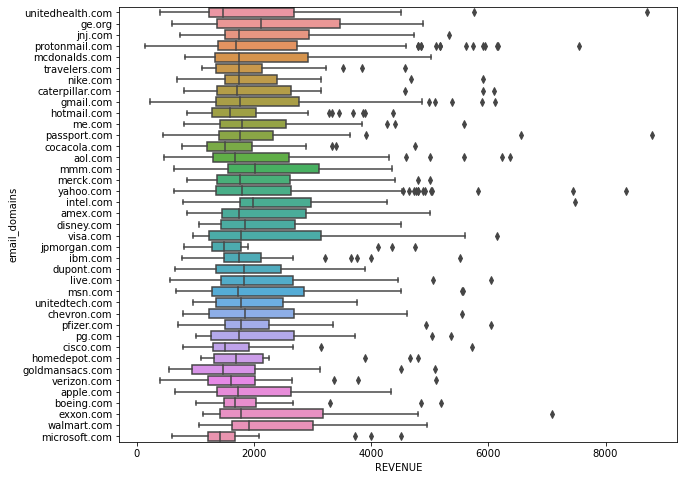

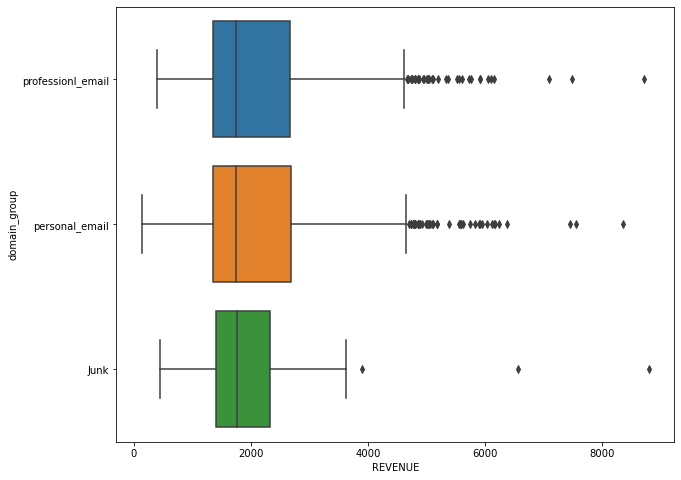

In [22]:
email_boxplots(response = 'REVENUE',
					 cat_var  = 'email_domains',
					 data     = chef)


# calling the function for emails
email_boxplots(response = 'REVENUE',
					 cat_var  = 'domain_group',
					 data     = chef)

### Feature Engineering

In [23]:
# one hot encoding categorical variables
one_hot_Unique = pd.get_dummies(chef['UNIQUE_MEALS_PURCH'])

# dropping categorical variables after they've been encoded
chef = chef.drop('UNIQUE_MEALS_PURCH', axis = 1)

# joining codings together
chef = chef.join([one_hot_Unique])

In [24]:
#####IMPORTANT section - Featuring engineered

# log transforming Revenue, Avg Prep Time, Total Meals, and Uni Meals -> saving it to the dataset
chef['log_Revenue'] = np.log10(chef['REVENUE'])
chef['log_avg_prep'] = np.log10(chef['AVG_PREP_VID_TIME']) #the distribution is normal
chef['log_total_meals'] = np.log10(chef['TOTAL_MEALS_ORDERED']).round(2)

# log total photos viewed
chef.loc[(chef['TOTAL_PHOTOS_VIEWED']==0), 'TOTAL_PHOTOS_VIEWED' ] = 0.01
chef['log_total_photos_viewed'] = np.log10(chef['TOTAL_PHOTOS_VIEWED']).round(2)

######

## The total delivery erros that occured
chef.loc[:,"delivery_errors"] = chef.loc[:,"EARLY_DELIVERIES"]+ chef.loc[:,"LATE_DELIVERIES"]

#the total percentage of delivery errors in the order 
chef.loc[:,"percentage_delivery_errors"] = (chef.loc[:,"EARLY_DELIVERIES"]+ 
                                            chef.loc[:,"LATE_DELIVERIES"])/chef.loc[:,"TOTAL_MEALS_ORDERED"].round(2)
                                 
chef['total_cancelled'] = chef['CANCELLATIONS_BEFORE_NOON'] + chef['CANCELLATIONS_AFTER_NOON']

## Ratio of customer care contact with number of orders
chef.loc[ : , "unhappy_customers"] = (chef.loc[:,"CONTACTS_W_CUSTOMER_SERVICE"]/
                                      chef.loc[:,"TOTAL_MEALS_ORDERED"]).round(2)

#####

# the ratio of unique orders 
#chef.loc[: , "unique_orders_ratio"] = (chef.loc[:,"TOTAL_MEALS_ORDERED"]/
 #                                   chef.loc[:,"UNIQUE_MEALS_PURCH"]).round(2)
# How many unique orders happened 
#chef.loc[: , "re_unique_orders"] = (chef.loc[:,"TOTAL_MEALS_ORDERED"]-
 #                                   chef.loc[:,"UNIQUE_MEALS_PURCH"]).round(2)



# checking results
chef[['log_total_meals', 'log_avg_prep', 'delivery_errors', 'log_total_photos_viewed',
      'percentage_delivery_errors', 'total_cancelled', 'total_logins','unhappy_customers']].head()


,log_total_meals,log_avg_prep,delivery_errors,log_total_photos_viewed,percentage_delivery_errors,total_cancelled,total_logins,unhappy_customers
0,1.15,1.523746,2,-2.00,0.142857,4,7,0.86
1,1.94,1.928396,2,2.23,0.022989,0,6,0.09
2,1.18,1.799341,1,-2.00,0.066667,3,7,0.73
3,1.11,1.641474,3,-2.00,0.230769,2,7,0.85
4,1.67,1.928396,8,2.31,0.170213,0,6,0.13


In [25]:
# creating a (Pearson) correlation matrix
df_corr = chef.corr().round(2)


# printing (Pearson) correlations with log_Revenue
print(df_corr.loc['log_Revenue'].sort_values(ascending = False))

log_Revenue                    1.00
REVENUE                        0.95
log_total_meals                0.69
log_avg_prep                   0.67
AVG_PREP_VID_TIME              0.65
MEDIAN_MEAL_RATING             0.65
TOTAL_MEALS_ORDERED            0.61
has_attended_master            0.48
MASTER_CLASSES_ATTENDED        0.47
LARGEST_ORDER_SIZE             0.45
TOTAL_PHOTOS_VIEWED            0.43
log_total_photos_viewed        0.41
1                              0.21
AVG_TIME_PER_SITE_VISIT        0.14
10                             0.09
18                             0.06
12                             0.06
11                             0.06
13                             0.05
19                             0.05
PRODUCT_CATEGORIES_VIEWED      0.04
MOBILE_NUMBER                  0.04
6                              0.02
PC_LOGINS                      0.01
TASTES_AND_PREFERENCES         0.01
3                              0.01
CANCELLATIONS_BEFORE_NOON      0.01
CROSS_SELL_SUCCESS          

In [26]:
# dropping categorical variables to prepare modeling
# preparing explanatory variable data
chef_data  = chef.drop(['NAME','EMAIL', 'FIRST_NAME', 'FAMILY_NAME','email_domains', 
                        'domain_group', 'REVENUE','log_Revenue','AVG_PREP_VID_TIME' ,
                        'log_total_meals', 'TOTAL_PHOTOS_VIEWED'  
                               ],
                                axis = 1)

#have to drop the x variables that you log

## Modeling

In [27]:
# according to lr OLS 0.678 - FULL Testing Score  : 0.7311
#x3_variables = ['AVG_CLICKS_PER_VISIT', 
 #               'has_attended_master', 
  #              'log_unique_meals', 
   #             'CONTACTS_W_CUSTOMER_SERVICE',
    #            'log_avg_prep',
     #           'MASTER_CLASSES_ATTENDED',
      #          'MEDIAN_MEAL_RATING',
       #         'TOTAL_PHOTOS_VIEWED',
        #        're_unique_orders',
         #       'unhappy_customers',
          #      'total_cancelled',
           #     'percentage_delivery_errors',
            #    'total_logins',
             #   'has_weekly_plan',
              #  'PRODUCT_CATEGORIES_VIEWED',
               # 'AVG_TIME_PER_SITE_VISIT',
                #'MOBILE_NUMBER',
                #'CANCELLATIONS_BEFORE_NOON',
                #'has_mobile_login']

In [2]:
#x_variables gave me the test score of 0.6239 with log
#x_variables = ['AVG_CLICKS_PER_VISIT', 'MASTER_CLASSES_ATTENDED', 
 #                                       'log_total_meals',
  #                                      'MEDIAN_MEAL_RATING',
   #                                     're_unique_orders',
    #                                    'LARGEST_ORDER_SIZE', 
     #                                   'TOTAL_PHOTOS_VIEWED',                                              
      #                                  'unhappy_customers',
       #                                 'log_avg_prep',
        #                                'delivery_errors']

x1_variables = [
                                            'TOTAL_MEALS_ORDERED',
                                            'CONTACTS_W_CUSTOMER_SERVICE',
                                            'PRODUCT_CATEGORIES_VIEWED',
                                            'CANCELLATIONS_BEFORE_NOON',
                                            'TASTES_AND_PREFERENCES',
                                            'MOBILE_LOGINS',
                                            'WEEKLY_PLAN',
                                            'EARLY_DELIVERIES',
                                            'LATE_DELIVERIES',
                                            'PACKAGE_LOCKER',
                                            'REFRIGERATED_LOCKER',
                                            'log_avg_prep',
                                            'LARGEST_ORDER_SIZE',
                                            'MASTER_CLASSES_ATTENDED',
                                            'MEDIAN_MEAL_RATING',
                                            'AVG_CLICKS_PER_VISIT',
                                            'total_logins',
                                            'has_attended_master',
                                            'has_weekly_plan',
                                            'professionl_email',
                                            'delivery_errors',
                                            'percentage_delivery_errors',
                                            'total_cancelled',
                                            'log_total_photos_viewed'
                                           ]



# test score 0.6666
#x2_variables = ['UNIQUE_MEALS_PURCH',
 #               'CONTACTS_W_CUSTOMER_SERVICE',
  #              'MASTER_CLASSES_ATTENDED',
   #             'MEDIAN_MEAL_RATING',
    #            'TOTAL_PHOTOS_VIEWED',
     #           'TASTES_AND_PREFERENCES',
      #          're_unique_orders',
       #         'unhappy_customers',
        #        'delivery_errors',
         #       'total_cancelled',
          #      'PRODUCT_CATEGORIES_VIEWED',
           #     'percentage_delivery_errors',
            #    'AVG_TIME_PER_SITE_VISIT',
             #   'has_attended_master']
                
# looping to make x-variables suitable for statsmodels
#for val in x1_variables:
   #  print(f"{val} +")

In [3]:
x1_variables

['TOTAL_MEALS_ORDERED',
 'CONTACTS_W_CUSTOMER_SERVICE',
 'PRODUCT_CATEGORIES_VIEWED',
 'CANCELLATIONS_BEFORE_NOON',
 'TASTES_AND_PREFERENCES',
 'MOBILE_LOGINS',
 'WEEKLY_PLAN',
 'EARLY_DELIVERIES',
 'LATE_DELIVERIES',
 'PACKAGE_LOCKER',
 'REFRIGERATED_LOCKER',
 'log_avg_prep',
 'LARGEST_ORDER_SIZE',
 'MASTER_CLASSES_ATTENDED',
 'MEDIAN_MEAL_RATING',
 'AVG_CLICKS_PER_VISIT',
 'total_logins',
 'has_attended_master',
 'has_weekly_plan',
 'professionl_email',
 'delivery_errors',
 'percentage_delivery_errors',
 'total_cancelled',
 'log_total_photos_viewed']

### Model Types

In [29]:
# preparing response variable data
chef_target = chef.loc[ : , 'REVENUE'] #chef_data??
log_chef_target = chef.loc[ : , 'log_Revenue'] # ready for use later

# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
                                    chef_data, 
                                    chef_target,
                                    test_size = 0.25, 
                                    random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (1459, 50)
y-side: (1459,)


Testing Data
------------
X-side: (487, 50)
y-side: (487,)



#### OLS Regression Model Type

In [30]:
ols_data  = chef.loc[ : ,x1_variables]

#target and preparation of the data done above

#Preparing the target variable
#chef_target = chef.loc[ : , 'REVENUE']


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)

x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            chef_data,     # x-variables
            log_chef_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            log_chef_target,   # y-variable logged
            test_size = 0.25,
            random_state = 219)

In [31]:
# merging x_train and y_train so that they can be used in statsmodels
chef_train = pd.concat([x_train, y_train], axis = 1)


# Building a model
lm_best = smf.ols(formula =  """REVENUE ~ 
CONTACTS_W_CUSTOMER_SERVICE +
log_avg_prep +
LARGEST_ORDER_SIZE +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
has_weekly_plan +
percentage_delivery_errors
""", data = chef_train)

#fitting the model based on the data
results = lm_best.fit()



#Analyzing the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     243.6
Date:                Tue, 09 Feb 2021   Prob (F-statistic):          1.29e-239
Time:                        23:23:56   Log-Likelihood:                -11750.
No. Observations:                1459   AIC:                         2.352e+04
Df Residuals:                    1451   BIC:                         2.356e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [32]:
# INSTANTIATING a model object
lr = LinearRegression()
#Ridge other models

## check the difference with the OLS is changed to FULL

# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square

lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

#Make sure the train and test gap is below 0.05 should not go above that

OLS Training Score : 0.6694
OLS Testing Score  : 0.6894
OLS Train-Test Gap : 0.02


In [33]:
# zipping each feature name to its coefficient
lr_model_values = zip(chef_data[x1_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair),

('intercept', 1.73)
('TOTAL_MEALS_ORDERED', 0.0)
('CONTACTS_W_CUSTOMER_SERVICE', 0.0)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('TASTES_AND_PREFERENCES', 0.01)
('MOBILE_LOGINS', -0.01)
('WEEKLY_PLAN', 0.0)
('EARLY_DELIVERIES', 0.0)
('LATE_DELIVERIES', 0.0)
('PACKAGE_LOCKER', -0.01)
('REFRIGERATED_LOCKER', -0.02)
('log_avg_prep', 0.66)
('LARGEST_ORDER_SIZE', -0.02)
('MASTER_CLASSES_ATTENDED', 0.02)
('MEDIAN_MEAL_RATING', 0.06)
('AVG_CLICKS_PER_VISIT', -0.0)
('total_logins', 0.0)
('has_attended_master', 0.02)
('has_weekly_plan', -0.02)
('professionl_email', -0.0)
('delivery_errors', 0.0)
('percentage_delivery_errors', -0.33)
('total_cancelled', -0.0)
('log_total_photos_viewed', 0.01)


In [34]:
# INSTANTIATING a model object
lr = LinearRegression()
#Ridge other models

## checking the difference with the OLS is changed to FULL
# FITTING to the training data
FULL_lr_fit = lr.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
FULL_lr_pred = FULL_lr_fit.predict(x_test_FULL)


# SCORING the results
print('FULL Training Score :', lr.score(x_train_FULL, y_train_FULL).round(4))  # using R-square
print('FULL Testing Score  :',  lr.score(x_test_FULL, y_test_FULL).round(4)) # using R-square

FULL_lr_train_score = lr.score(x_train_FULL, y_train_FULL).round(4)
FULL_lr_test_score  = lr.score(x_test_FULL, y_test_FULL).round(4)

# displaying and saving the gap between training and testing
print('FULL Train-Test Gap :', abs(FULL_lr_train_score - FULL_lr_test_score).round(4))
FULL_lr_test_gap = abs(FULL_lr_train_score - FULL_lr_test_score).round(4)

#Make sure the train and test gap is below 0.05 should not go above that

FULL Training Score : 0.8092
FULL Testing Score  : 0.8041
FULL Train-Test Gap : 0.0051


In [35]:
# zipping each feature name to its coefficient
FULL_lr_model_values = zip(chef_data[x1_variables].columns,
                      FULL_lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
FULL_lr_model_lst = [('intercept', FULL_lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in FULL_lr_model_values:
    FULL_lr_model_lst.append(val)
    

# checking the results
for pair in FULL_lr_model_lst:
    print(pair)

('intercept', 1.93)
('TOTAL_MEALS_ORDERED', -0.01)
('CONTACTS_W_CUSTOMER_SERVICE', 0.0)
('PRODUCT_CATEGORIES_VIEWED', 0.03)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('TASTES_AND_PREFERENCES', 0.0)
('MOBILE_LOGINS', 0.0)
('WEEKLY_PLAN', 0.0)
('EARLY_DELIVERIES', -0.0)
('LATE_DELIVERIES', 0.01)
('PACKAGE_LOCKER', 0.0)
('REFRIGERATED_LOCKER', -0.0)
('log_avg_prep', 0.0)
('LARGEST_ORDER_SIZE', -0.0)
('MASTER_CLASSES_ATTENDED', 0.0)
('MEDIAN_MEAL_RATING', -0.01)
('AVG_CLICKS_PER_VISIT', -0.01)
('total_logins', -0.01)
('has_attended_master', 0.01)
('has_weekly_plan', 0.05)
('professionl_email', -0.0)
('delivery_errors', -0.0)
('percentage_delivery_errors', 0.03)
('total_cancelled', -0.0)
('log_total_photos_viewed', -0.0)


### BREAK

#### Bayesian Automatic Relevance Determination (ARD)

In [36]:
#runned above sometimes might need to run again with my server
import sklearn.linear_model # linear models

In [37]:
ols_data  = chef.loc[ : ,x1_variables]

#target and preparation of the data done above

#Preparing the target variable
#chef_target = chef.loc[ : , 'REVENUE']


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)

x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            chef_data,     # x-variables
            log_chef_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            log_chef_target,   # y-variable logged
            test_size = 0.25,
            random_state = 219)

In [38]:
#### starting a new model (New 2)
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize  = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.7926
Testing Score : 0.7849
ARD Train-Test Gap : 0.0077


In [39]:
# zipping each feature name to its coefficient
ard_model_values = zip(chef_data.columns, ard_fit.coef_.round(decimals = 3))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 1.97)
('CROSS_SELL_SUCCESS', -0.01)
('TOTAL_MEALS_ORDERED', 0.0)
('CONTACTS_W_CUSTOMER_SERVICE', 0.035)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('AVG_TIME_PER_SITE_VISIT', 0.0)
('MOBILE_NUMBER', 0.0)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('CANCELLATIONS_AFTER_NOON', 0.0)
('TASTES_AND_PREFERENCES', 0.0)
('PC_LOGINS', 0.0)
('MOBILE_LOGINS', 0.0)
('WEEKLY_PLAN', 0.0)
('EARLY_DELIVERIES', 0.0)
('LATE_DELIVERIES', 0.0)
('PACKAGE_LOCKER', 0.0)
('REFRIGERATED_LOCKER', -0.012)
('LARGEST_ORDER_SIZE', 0.0)
('MASTER_CLASSES_ATTENDED', 0.021)
('MEDIAN_MEAL_RATING', 0.065)
('AVG_CLICKS_PER_VISIT', 0.0)
('total_logins', 0.0)
('has_mobile_login', 0.022)
('has_pc_login', -0.0)
('has_total_logins', 0.0)
('has_attended_master', 0.014)
('has_weekly_plan', -0.009)
('Junk', 0.0)
('personal_email', 0.0)
('professionl_email', 0.0)
(1, 0.238)
(2, 0.0)
(3, 0.0)
(4, 0.0)
(5, 0.0)
(6, 0.0)
(7, 0.0)
(8, 0.0)
(9, 0.0)
(10, 0.075)
(11, 0.028)
(12, 0.0)
(13, 0.002)
(18, 0.105)
(19, 0.002)
('log_avg_prep', 0.42

In [40]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 1.97)
('CROSS_SELL_SUCCESS', -0.01)
('CONTACTS_W_CUSTOMER_SERVICE', 0.035)
('AVG_TIME_PER_SITE_VISIT', 0.0)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('TASTES_AND_PREFERENCES', 0.0)
('MOBILE_LOGINS', 0.0)
('EARLY_DELIVERIES', 0.0)
('PACKAGE_LOCKER', 0.0)
('REFRIGERATED_LOCKER', -0.012)
('MASTER_CLASSES_ATTENDED', 0.021)
('MEDIAN_MEAL_RATING', 0.065)
('total_logins', 0.0)
('has_mobile_login', 0.022)
('has_total_logins', 0.0)
('has_attended_master', 0.014)
('has_weekly_plan', -0.009)
('personal_email', 0.0)
(1, 0.238)
(3, 0.0)
(5, 0.0)
(7, 0.0)
(9, 0.0)
(10, 0.075)
(11, 0.028)
(13, 0.002)
(18, 0.105)
(19, 0.002)
('log_avg_prep', 0.429)
('delivery_errors', 0.0)
('percentage_delivery_errors', -0.049)
('unhappy_customers', -0.528)


#### Lasso  Regression

In [41]:
# preparing training and testing sets (all letters are lowercase)
X_train, X_test, Y_train, Y_test = train_test_split(
                                    chef_data, 
                                    chef_target,
                                    test_size = 0.25, 
                                    random_state = 219)

###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)

X_train_FULL, X_test_FULL, Y_train_FULL, Y_test_FULL = train_test_split(
            chef_data,     # x-variables
            chef_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
X_train_OLS, X_test_OLS, Y_train_OLS, Y_test_OLS = train_test_split(
            ols_data,         # x-variables
            chef_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

In [42]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude



# FITTING to the training data
lasso_fit = lasso_model.fit(X_train_FULL, Y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(X_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(X_train_FULL, Y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(X_test_FULL, Y_test_FULL).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(X_train_FULL, Y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(X_test_FULL, Y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lasso_test_gap = abs(lr_train_score - lr_test_score).round(4)

#the gap has gone down and minimized and look at the coef and bound to have insignicant to complete (0,0)

Lasso Training Score : 0.7023
Lasso Testing Score  : 0.7065
Lasso Train-Test Gap : 0.02


In [43]:
# zipping each feature name to its coefficient
lasso_model_values = zip(chef_data.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', -4102.98)
('CROSS_SELL_SUCCESS', -0.0)
('TOTAL_MEALS_ORDERED', 5.09)
('CONTACTS_W_CUSTOMER_SERVICE', 83.69)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('AVG_TIME_PER_SITE_VISIT', 0.0)
('MOBILE_NUMBER', -0.0)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('CANCELLATIONS_AFTER_NOON', 0.0)
('TASTES_AND_PREFERENCES', 0.0)
('PC_LOGINS', -0.0)
('MOBILE_LOGINS', -0.0)
('WEEKLY_PLAN', 0.0)
('EARLY_DELIVERIES', -0.0)
('LATE_DELIVERIES', 0.0)
('PACKAGE_LOCKER', -0.0)
('REFRIGERATED_LOCKER', -0.0)
('LARGEST_ORDER_SIZE', -0.0)
('MASTER_CLASSES_ATTENDED', 151.71)
('MEDIAN_MEAL_RATING', 274.78)
('AVG_CLICKS_PER_VISIT', -19.24)
('total_logins', -0.0)
('has_mobile_login', 0.0)
('has_pc_login', 0.0)
('has_total_logins', 0.0)
('has_attended_master', 0.0)
('has_weekly_plan', -0.0)
('Junk', 0.0)
('personal_email', -0.0)
('professionl_email', 0.0)
(1, 1150.18)
(2, -0.0)
(3, -0.0)
(4, -0.0)
(5, -0.0)
(6, 0.0)
(7, 0.0)
(8, 0.0)
(9, -0.0)
(10, 0.0)
(11, 0.0)
(12, 0.0)
(13, -0.0)
(18, 0.0)
(19, -0.0)
('log_avg_prep

In [44]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', -4102.98)
('TOTAL_MEALS_ORDERED', 5.09)
('CONTACTS_W_CUSTOMER_SERVICE', 83.69)
('AVG_TIME_PER_SITE_VISIT', 0.0)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('TASTES_AND_PREFERENCES', 0.0)
('MOBILE_LOGINS', -0.0)
('EARLY_DELIVERIES', -0.0)
('PACKAGE_LOCKER', -0.0)
('LARGEST_ORDER_SIZE', -0.0)
('MASTER_CLASSES_ATTENDED', 151.71)
('MEDIAN_MEAL_RATING', 274.78)
('AVG_CLICKS_PER_VISIT', -19.24)
('has_mobile_login', 0.0)
('has_total_logins', 0.0)
('has_weekly_plan', -0.0)
('personal_email', -0.0)
(1, 1150.18)
(3, -0.0)
(5, -0.0)
(7, 0.0)
(9, -0.0)
(11, 0.0)
(13, -0.0)
(19, -0.0)
('log_avg_prep', 2164.04)
('log_total_photos_viewed', 32.99)
('percentage_delivery_errors', -0.0)
('unhappy_customers', -688.33)


# Comparing Results

In [46]:
# comparing results

print(f"""
Model      Train Score      Test Score      Gap Train/Test Gap      Model Size
-----      -----------      ----------         ----------           ----------
OLS        {lr_train_score}           {lr_test_score}                {lr_test_gap}                 {len(lr_model_lst)}
FULL OLS   {FULL_lr_train_score}           {FULL_lr_test_score}                {FULL_lr_test_gap}               {len(FULL_lr_model_lst)} 
Lasso      {lasso_train_score}           {lasso_test_score}                {lasso_test_gap}                 {len(lasso_model_lst)}
ARD        {ard_train_score}           {ard_test_score}                {ard_test_gap}               {len(ard_model_lst)}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, FULL_lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score,FULL_lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, FULL_lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst),len(FULL_lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst,FULL_lr_model_lst, lasso_model_lst, ard_model_lst]}


#printing final outcome ceofficients
print(f"""The best model is FULL OLS with a score of {FULL_lr_test_score} and train test gap of {FULL_lr_test_gap}. The model size is {len(FULL_lr_model_lst)}!

For more information, please see the coefficients below for all model types:""")

print(f"""
\n FULL OLS model - size {len(FULL_lr_model_lst)}, Coefficients:
""")


Model      Train Score      Test Score      Gap Train/Test Gap      Model Size
-----      -----------      ----------         ----------           ----------
OLS        0.6694           0.6894                0.02                 25
FULL OLS   0.8092           0.8041                0.0051               25 
Lasso      0.7023           0.7065                0.02                 29
ARD        0.7926           0.7849                0.0077               32

The best model is ARD with a score of 0.8041 and train test gap of 0.0051. The model size is 25!

For more information, please see the coefficients below for all model types:


 FULL OLS model - size 25, Coefficients:



In [ ]:
# printing out each feature-coefficient pair one by one
for val in FULL_lr_model_values:
    FULL_lr_model_lst.append(val)
    

# checking the results
for pair in FULL_lr_model_lst:
    print(pair)  
    
print(f"""
\n ARD model - size {len(ard_model_lst)}, Coefficients:
""")
# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)

# checking the results
for pair in ard_model_lst:
    print(pair)
     
print(f"""
\n OLS model - size {len(lr_model_lst)}, Coefficients:
""")
# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)
        
print(f"""
\n LASSO model - size {len(lasso_model_lst)}, Coefficients:
""")
# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

    

In [ ]:
import time
start_time = time.time()


#coding
print("---%s seconds---"%(time.time() - start_time))